# ISD - TP 3 - Solutions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gapminder import gapminder

# Import helper functions from `utils.py` file.
import utils

## Exercise I - Analyse des données socio-économiques

In [3]:
# Optimization of the DataFrame types
# Storing countries and continents as string is not efficient, converting to `category` type.
df = utils.cast_to_category_pd(gapminder)

### Exercise 1 -

In [4]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    1704 non-null   category
 1   continent  1704 non-null   category
 2   year       1704 non-null   int64   
 3   lifeExp    1704 non-null   float64 
 4   pop        1704 non-null   int64   
 5   gdpPercap  1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 63.8 KB


In [7]:
# As you can see, the original DataFrame takes more space because it stores the strings as object. 
# This is not critical in this case, but depending on the dataset, casting can make a difference between 
# a DataFrame that fits into memory and one that doesn't.
gapminder.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### Exercise 2 -

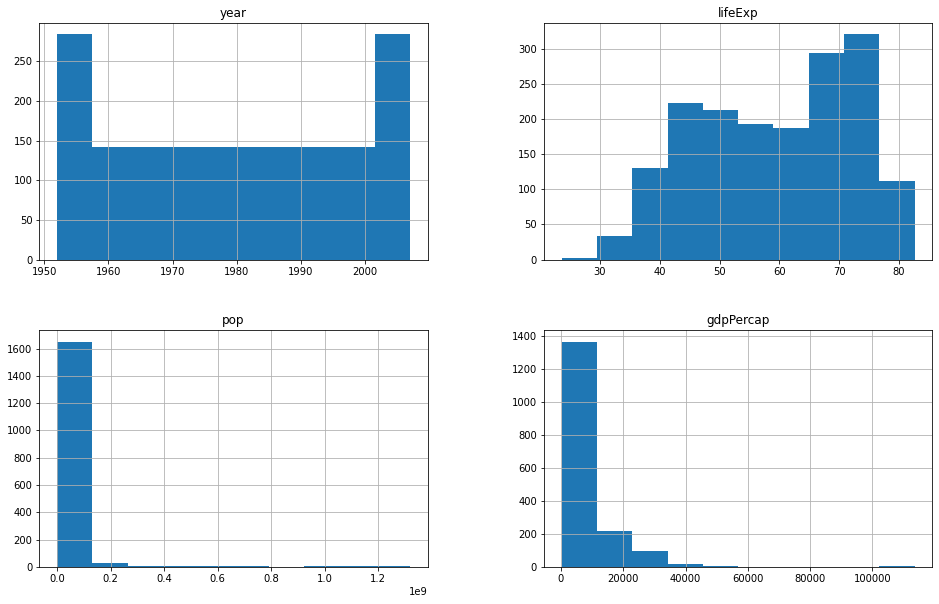

In [8]:
df.hist(figsize=(16, 10));

Observations: 

pop: We can see that the majority of countries have a small population, except for a few that have 1mia. 

gdpPercap: The same phenomenon applies, where most countries have a smal gdp and a few countries have all the wealth. 

By setting a limit on the X axis, we could see with more details the left parts of the plots, with smaller pop and gdpPercap to see their distribution. 

### Exercise 3 -

In [9]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [10]:
# Number of observations by country for each year.
df.groupby('country').size()
# or: df.groupby('country').count()
# or: df.groupby('country').agg('count')

country
Afghanistan           12
Albania               12
Algeria               12
Angola                12
Argentina             12
                      ..
Vietnam               12
West Bank and Gaza    12
Yemen, Rep.           12
Zambia                12
Zimbabwe              12
Length: 142, dtype: int64

In [11]:
df.groupby(['country', 'year']).size().describe()
# We have one observation by country, by year.

count    1704.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

In [12]:
df.groupby('country').size().describe()
# We have twelve observations by country.

count    142.0
mean      12.0
std        0.0
min       12.0
25%       12.0
50%       12.0
75%       12.0
max       12.0
dtype: float64

In [13]:
df.groupby('year').size()
# We have lots of missing  years.

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
dtype: int64

In [14]:
countries = df['country'].unique()
years = df['year'].unique()
all_idxs = pd.MultiIndex.from_product([countries, range(years.min(), years.max())], names=['country', 'year'])
missing_idxs = all_idxs.difference(df.groupby(['country', 'year']).size().index)
print(f'Number of missing values: {missing_idxs.shape[0]:,}')
print(f"Number of missing years: {len(range(years.min(), years.max())) + 1 - len(df['year'].unique())}")

Number of missing values: 6,248
Number of missing years: 44


### Exercise 4 - 

In [15]:
print(f"Unique continents: {df['continent'].unique()}")
print(f"Unique countries: {df['country'].unique()}")
print(f"Unique years: {df['year'].unique()}")

Unique continents: ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
Categories (5, object): ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
Unique countries: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', ..., 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']
Length: 142
Categories (142, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']
Unique years: [1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


### Exercise 5 - 

In [16]:
(df
 .query('year in (1952, 2007)')
 .loc[:, ['year', 'lifeExp']]
 .groupby('year')
 .mean('lifeExp')
 )

,lifeExp
year,
1952,49.057620
2007,67.007423


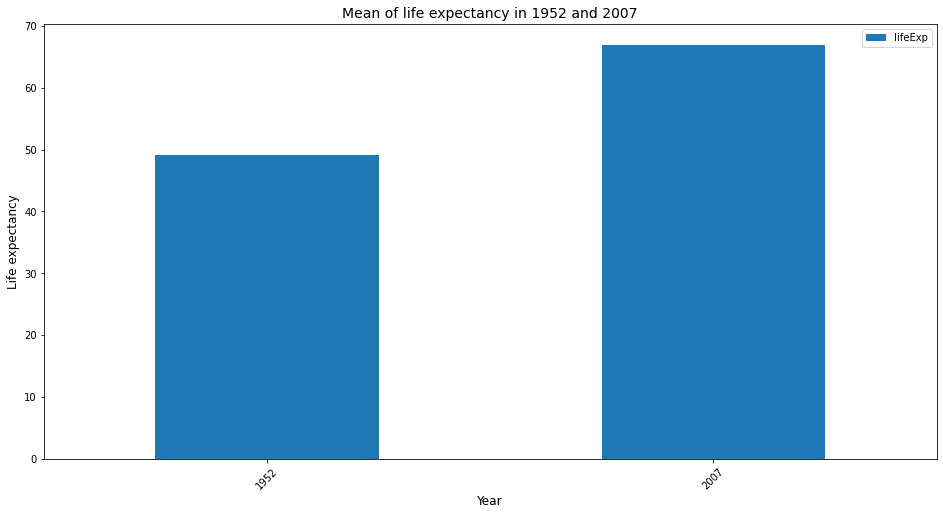

In [17]:
ax = (df
      .query('year in (1952, 2007)')
      .loc[:, ['year', 'lifeExp']]
      .groupby('year')
      .mean('lifeExp')
      .plot.bar(rot=45, figsize=(16, 8))
      )
ax.set_title('Mean of life expectancy in 1952 and 2007', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Life expectancy', fontsize=12);

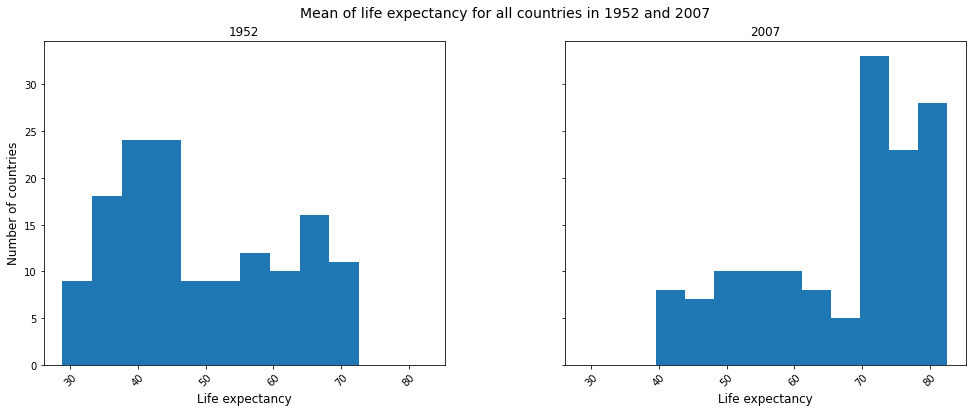

In [18]:
# Another way to compare the life expectancy between those two years is to use an histogram.
# Sharing both x and y axes allows for better visual comparison
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(16, 6))
(df
 .query('year in (1952, 2007)')
 .groupby(['year', 'country'])
 .mean('lifeExp')
 .hist(column='lifeExp', by='year', ax=axs, xrot=45, figsize=(16, 8))
 )
fig.suptitle('Mean of life expectancy for all countries in 1952 and 2007', fontsize=14)
axs[0].set_ylabel('Number of countries', fontsize=12)
[axs[i].set_xlabel('Life expectancy', fontsize=12) for i in (0, 1)];

### Exercise 6 -

In [19]:
(df
 .loc[:, ['year', 'continent', 'lifeExp']]
 .query('year in (1952, 2007)')
 .groupby(['year', 'continent'])
 .mean('lifeExp')
 .unstack('year')
 )

lifeExp           
year            1952       2007
continent                      
Africa     39.135500  54.806038
Americas   53.279840  73.608120
Asia       46.314394  70.728485
Europe     64.408500  77.648600
Oceania    69.255000  80.719500

In [20]:
df_life_exp = (df
               .loc[:, ['year', 'continent', 'lifeExp']]
               .query('year in (1952, 2007)')
               .groupby(['year', 'continent'])
               .mean('lifeExp')
               .unstack('year')
               )

In [21]:
df_life_exp.diff(axis=1)

lifeExp           
year         1952       2007
continent                   
Africa        NaN  15.670538
Americas      NaN  20.328280
Asia          NaN  24.414091
Europe        NaN  13.240100
Oceania       NaN  11.464500

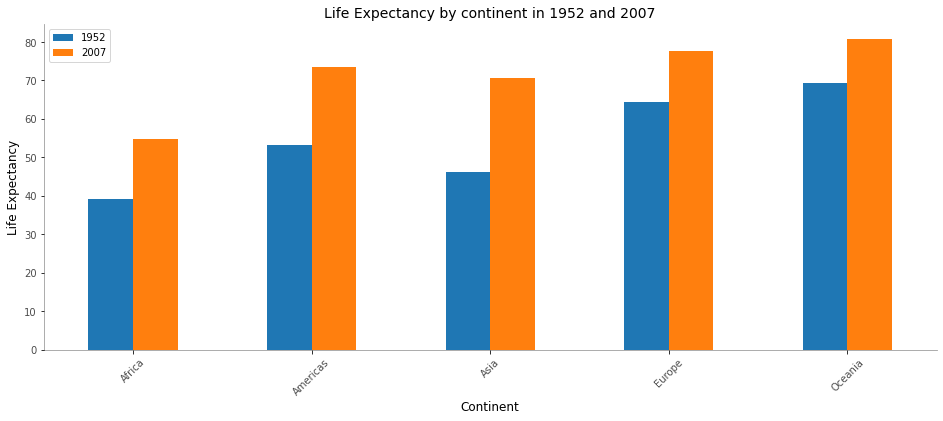

In [22]:
ax = (df
      .loc[:, ['year', 'continent', 'lifeExp']]
      .query('year in (1952, 2007)')
      .groupby(['year', 'continent'])
      .mean('lifeExp')
      .unstack('year')
      .plot.bar(rot=45, figsize=(16, 6))
      )
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Life Expectancy', fontsize=12)
ax.set_title('Life Expectancy by continent in 1952 and 2007', fontsize=14)
# Rename legend to remove the None and the `LifeExp`.
ax.legend(labels=['1952', '2007'])

utils.format_axis(ax);

### Exercise 7 -

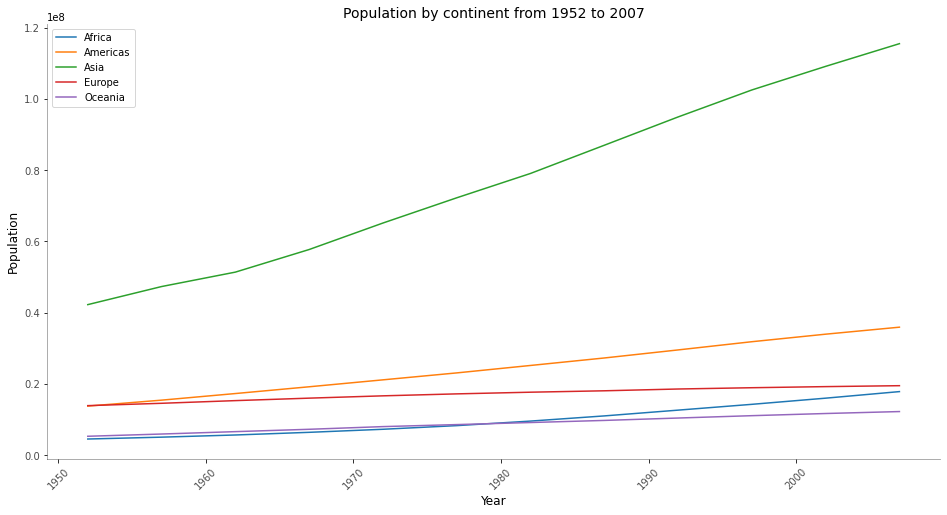

In [23]:
# Evolution of the population by continent from 1952 to 2007.
ax = (df
      .loc[:, ['year', 'continent', 'pop']]
      .groupby(['year', 'continent'])
      .mean('pop')
      .unstack('continent')
      .plot(rot=45, figsize=(16, 8))
      )
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population', fontsize=12)
ax.set_title('Population by continent from 1952 to 2007', fontsize=14)
ax.legend(sorted(df['continent'].unique()))

utils.format_axis(ax);

### Exercise 8 - 

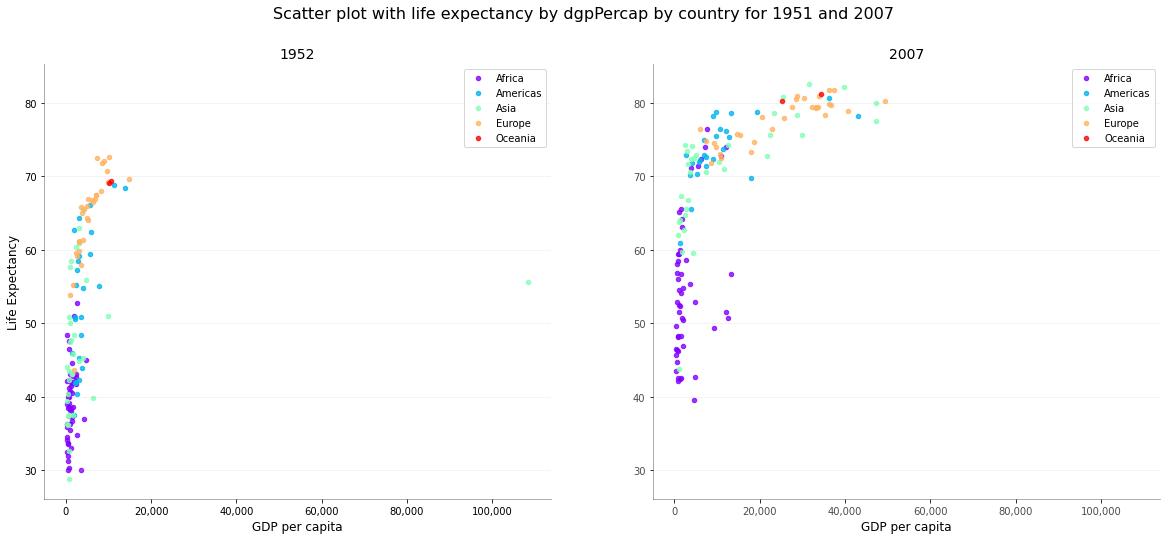

In [24]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(20, 8))

# Colormap for the continents.
cmap = utils.get_n_colors(len(df['continent'].unique()))

for i, year in enumerate((1952, 2007)):
    data = df.query('year == @year')
    # Plot each continent as a different color in order to have a legend. 
    for c, (continent, df_continent) in enumerate(data.groupby('continent')):
        df_continent.plot.scatter(ax=axs[i], x='gdpPercap', y='lifeExp', color=[cmap[c]], label=continent, alpha=0.8)
        
    axs[i].set_title(year, fontsize=14)
    axs[i].set_xlabel('GDP per capita', fontsize=12)
    
    utils.format_axis(axs[i])
    axs[i].grid(axis='y', linestyle='--', alpha=0.4, lw=0.5)
    
axs[0].set_ylabel('Life Expectancy', fontsize=12)
fig.suptitle('Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007', fontsize=16)

utils.set_thousands_separator(axs, which='x', nb_decimals=0);

### Exercise 9 - 

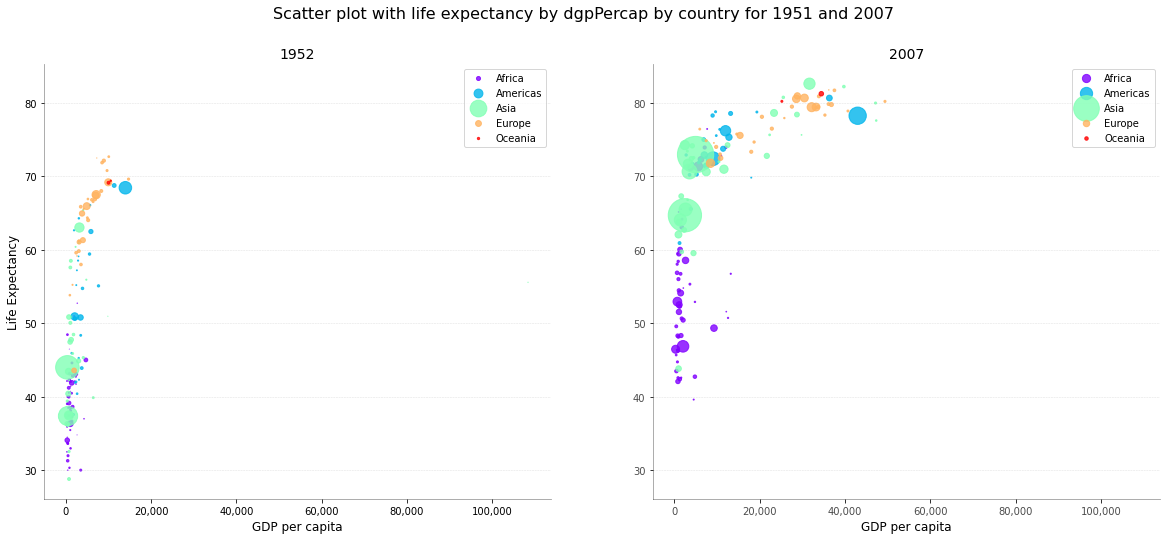

In [25]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(20, 8))

# Colormap for the continents.
cmap = utils.get_n_colors(len(df['continent'].unique()))

for i, year in enumerate((1952, 2007)):
    data = df.query('year == @year')
    # Plot each continent as a different color in order to have a legend. 
    for c, (continent, df_continent) in enumerate(data.groupby('continent')):
        df_continent.plot.scatter(ax=axs[i], x='gdpPercap', y='lifeExp', 
                                  s=df_continent['pop'] / 1_000_000, color=[cmap[c]], label=continent, alpha=0.8)
        
    axs[i].set_title(year, fontsize=14)
    axs[i].set_xlabel('GDP per capita', fontsize=12)
    
    utils.format_axis(axs[i])
    axs[i].grid(axis='y', linestyle='--', alpha=0.4, lw=0.5)
    
axs[0].set_ylabel('Life Expectancy', fontsize=12)
fig.suptitle('Scatter plot with life expectancy by dgpPercap by country for 1951 and 2007', fontsize=16)

utils.set_thousands_separator(axs, which='x', nb_decimals=0);

### Exercise 10 - 

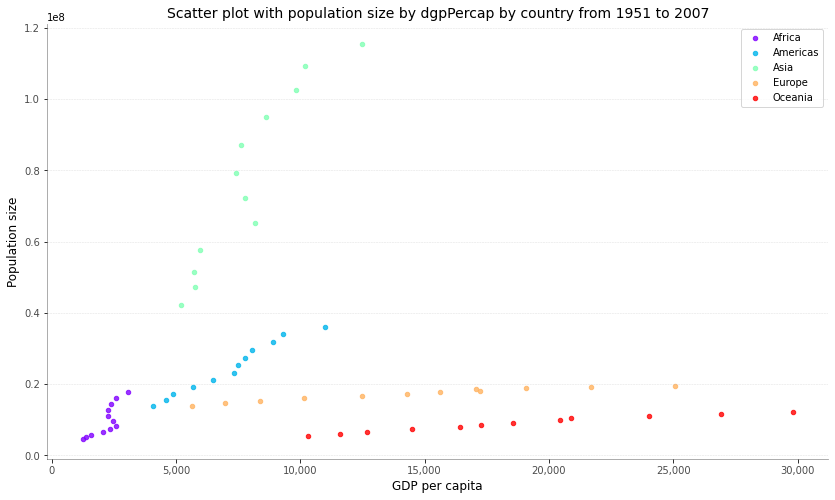

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Colormap for the continents.
cmap = utils.get_n_colors(len(df['continent'].unique()))

# Plot each continent as a different color in order to have a legend. 
for c, (continent, df_continent) in enumerate(df.groupby('continent')):
    df_continent.groupby('year').mean().plot.scatter(ax=ax, x='gdpPercap', y='pop', color=[cmap[c]], label=continent, alpha=0.8)
    
ax.set_title('Scatter plot with population size by dgpPercap by country from 1951 to 2007', fontsize=14)
ax.set_xlabel('GDP per capita', fontsize=12)
ax.set_ylabel('Population size', fontsize=12)

utils.format_axis(ax)
ax.grid(axis='y', linestyle='--', alpha=0.4, lw=0.5)

utils.set_thousands_separator(ax, which='x', nb_decimals=0);

## Exercise II - Base de données d'animaux

In [27]:
df_mass = (pd.read_csv("PanTHERIA_1-0_WR05_Aug2008.txt", sep='\t')
           .loc[:, ['5-1_AdultBodyMass_g']]
           .rename({'5-1_AdultBodyMass_g': 'mass'}, axis=1)
           )

In [28]:
df_mass['mass'].describe().apply('{:.3f}'.format)

count         5416.000
mean        115940.092
std        2638103.415
min           -999.000
25%           -999.000
50%             23.125
75%            281.915
max      154321304.500
Name: mass, dtype: object

Is it okay to have negative value as body mass ??? Probably not.

Text(0.5, 1.0, 'Boxplot of the mass above 0 (log scale)')

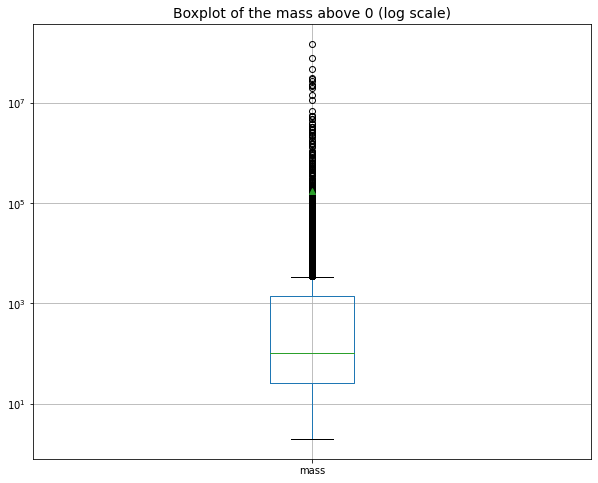

In [29]:
df_plot = df_mass.query('mass > 0')
ax = df_plot.boxplot(showmeans=True, figsize=(10, 8))
ax.set_yscale('log')
ax.set_title('Boxplot of the mass above 0 (log scale)', fontsize=14)

<AxesSubplot:title={'center':'Histogram of mass (all data)'}, xlabel='Mass $[g]$', ylabel='Frequency'>

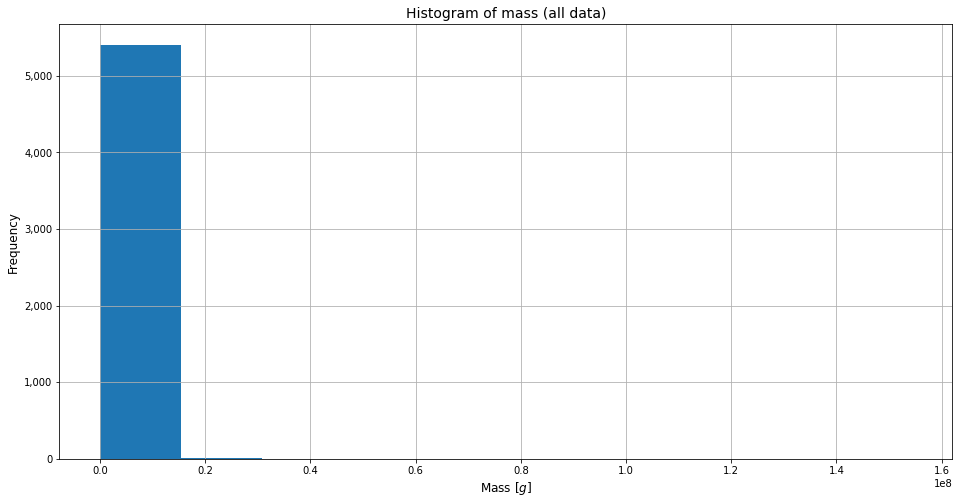

In [32]:
ax = df_mass['mass'].hist(figsize=(16, 8))
ax.set_title('Histogram of mass (all data)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel(r'Mass $[g]$', fontsize=12)
utils.set_thousands_separator(ax, which='y', nb_decimals=0)

<AxesSubplot:title={'center':'Histogram of mass betwen 0 and 50[kg]'}, xlabel='Mass $[g]$', ylabel='Frequency'>

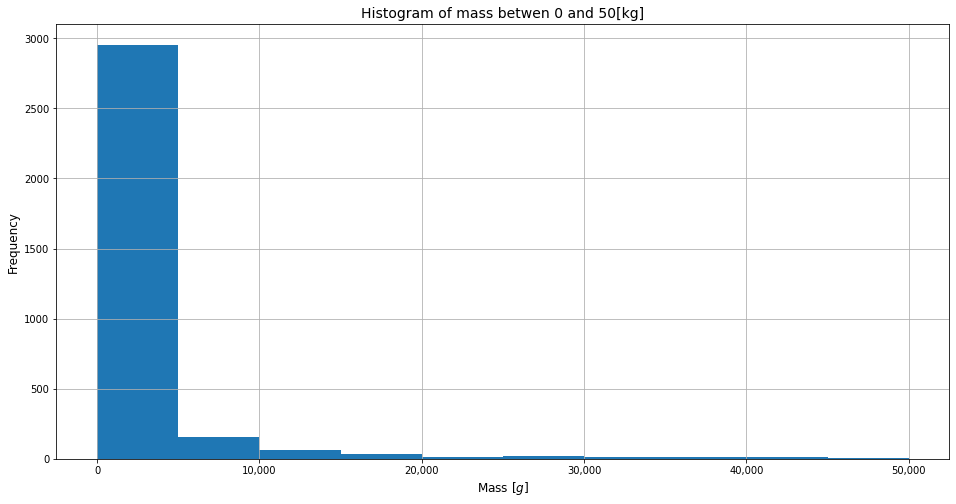

In [33]:
df_mass_filtered = df_mass.query('mass > 0 and mass < 50000')
ax = df_mass_filtered['mass'].hist(figsize=(16, 8))
ax.set_title('Histogram of mass betwen 0 and 50[kg]', fontsize=14)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel(r'Mass $[g]$', fontsize=12)
utils.set_thousands_separator(ax, which='x', nb_decimals=0)

In [34]:
def plot_benford_law(df: pd.DataFrame, column: str, 
                     title: str = 'Distribution of first digit') -> plt.axes:
    """
    Plot the distribution of the first digits compare to Benford distribution.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to plot the distribution from.
    column : str
        Column with the data to plot.
    title : str, default 'Distribution of first digit'
        Title for the plot (ax level).
    
    Returns
    -------
    plt.axes
        Matplotlib ax.
    """
    # Benford distribution. 
    benford = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]
    
    # Count first digits.
    counts = (df[column]
              .apply(lambda x: str(x)[0] if str(x)[0] != '-' else str(x)[1])
              .astype('int').value_counts()
              .drop(0, errors='ignore')  # Remove the 0, not in the Benford's distribution.
              )

    _, ax = plt.subplots(1, 1, figsize=(16, 8))
    ax.bar(counts.index, counts / sum(counts) * 100, tick_label=counts.index, color='lightgray')
    ax.scatter(range(1, 10), benford, color='r', zorder=2)

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('First digit', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    utils.format_axis(ax)
    return ax

<AxesSubplot:title={'center':"Benford's law with animal mass"}, xlabel='First digit', ylabel='Frequency'>

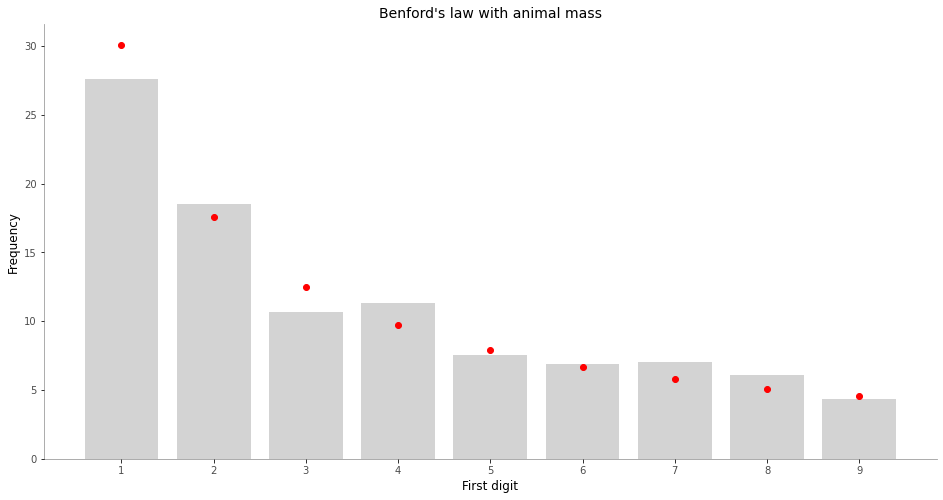

In [35]:
plot_benford_law(df_mass.query('mass > 0'), 'mass', "Benford's law with animal mass")

As we can see on the previous figure, the mass of the animals respects Benford's law pretty well, except for the digit 4 that is a little more reprensented.

In [36]:
df_mid_range_long = (pd.read_csv("PanTHERIA_1-0_WR05_Aug2008.txt", sep='\t')
                     .loc[:, ['26-7_GR_MidRangeLong_dd']]
                     .rename({'26-7_GR_MidRangeLong_dd': 'midrange'}, axis=1)
                     )

array([[<AxesSubplot:title={'center':'midrange'}>]], dtype=object)

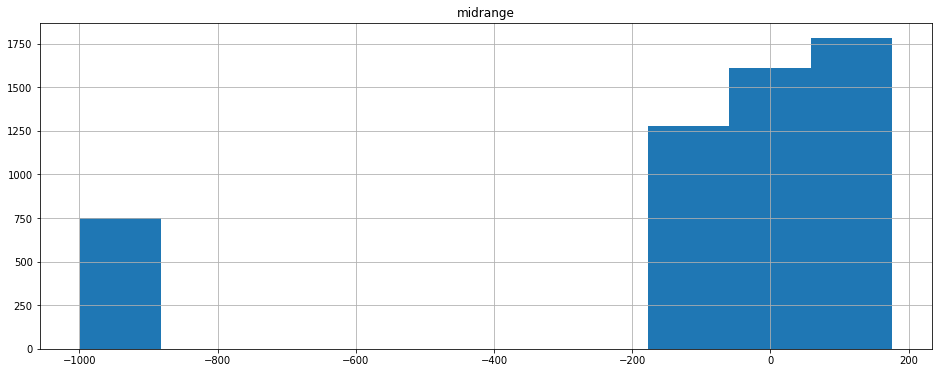

In [37]:
df_mid_range_long.hist(figsize=(16, 6))

array([[<AxesSubplot:title={'center':'midrange'}>]], dtype=object)

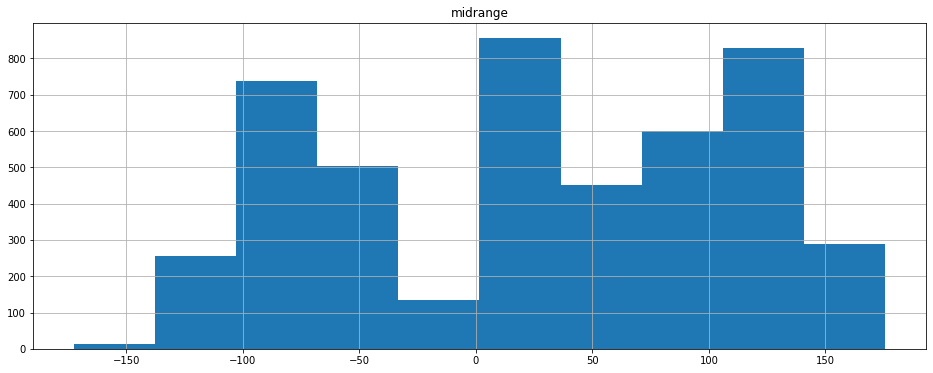

In [38]:
# Remove values below -200.
df_mid_range_filtered = df_mid_range_long.query('midrange > -200')
df_mid_range_filtered.hist(figsize=(16, 6))

<AxesSubplot:title={'center':"Benford's law with variable 26-7_GR_MidRangeLong_dd"}, xlabel='First digit', ylabel='Frequency'>

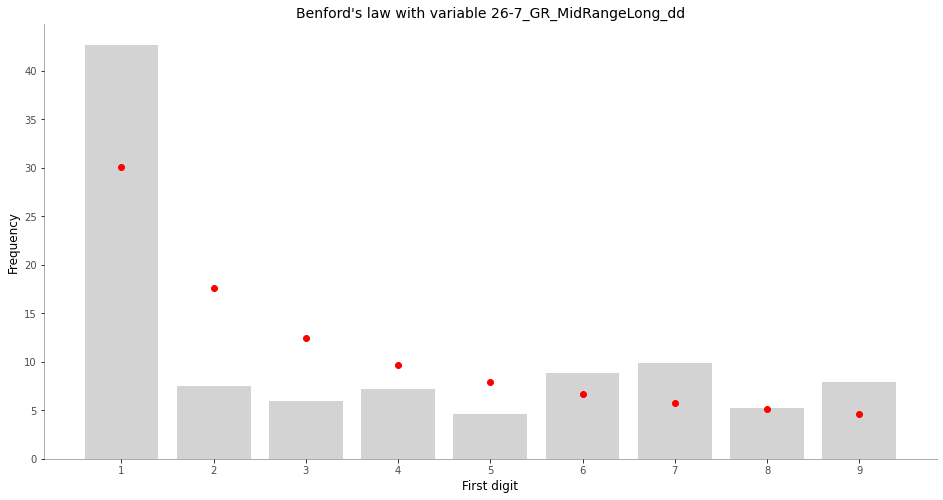

In [39]:
plot_benford_law(df_mid_range_filtered, 'midrange', "Benford's law with variable 26-7_GR_MidRangeLong_dd")

We can see that this variable does not respect the Benford's law as clearly as the mass. However, the digit 1 is still the most represented. 